---
categories : 
- librosa
title : "librosa를 이용한 간단한 음성 데이터 시각화"
tags:
- librosa
- Sound Data analysis
last_modified_at:
---

- 음성을 시각화 하는 방법을 알아보겠습니다. torch를 사용해서도 시각화가 가는하지만 python에는 음성데이터 처리에 강력한 librosa가 있습니다

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.io import wavfile
from glob import glob
from tqdm import tqdm

%matplotlib inline

sns.set_style('darkgrid')

In [2]:
def data_loader(files):
    out = []
    for file in tqdm(files):
        fs, data = wavfile.read(file)
        out.append(data)    
    out = np.array(out)
    return out

In [ ]:
%%time

# 데이터 불러오기
x_data = glob('./rsc/train/*.wav')
x_data = data_loader(x_data)

100%|█████████▉| 99975/100000 [01:20<00:00, 1300.65it/s]

In [3]:
%%time

fs, data = wavfile.read('./rsc/train/train_00303.wav')
data = np.array(data)

CPU times: user 935 µs, sys: 1.81 ms, total: 2.74 ms
Wall time: 2.74 ms


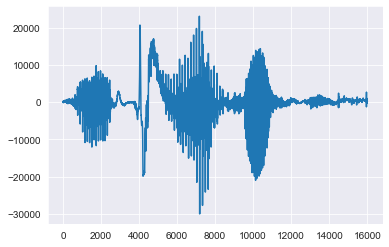

In [4]:
plt.plot(data)

In [ ]:
!sudo pip install numba==0.43.0
!sudo pip install llvmlite==0.32.1
!sudo pip install librosa

In [6]:
import librosa.display, librosa

In [8]:
sig, sr = librosa.load('./rsc/train/train_00303.wav')

Text(0.5, 1.0, 'Waveform')

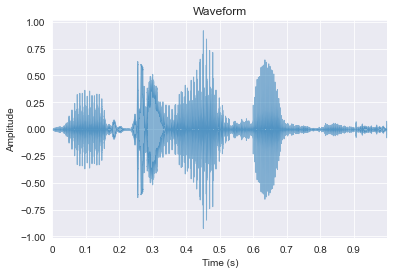

In [9]:
plt.figure()
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

Text(0.5, 1.0, 'Power spectrum')

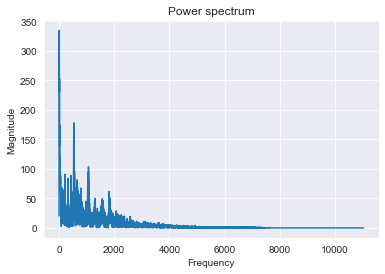

In [15]:
# Fourier -> Spectrum

fft = np.fft.fft(sig)

magnitude = np.abs(fft) 

f = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_f = f[:int(len(magnitude) / 2)]

plt.figure()
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

Text(0.5, 1.0, 'Spectrogram (dB)')

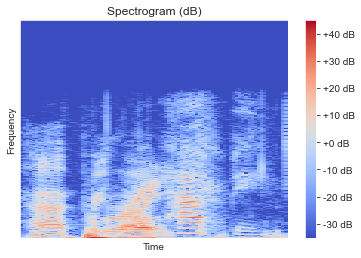

In [14]:
# STFT -> spectrogram

hop_length = 256
n_fft = 1024

hop_length_duration = float(hop_length) / sr
n_fft_duration = float(n_fft) / sr

stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

magnitude = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")